<a href="https://colab.research.google.com/github/nitron-alpha-kplr/Machine-Learning/blob/main/KMeans_Iris_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Classification des iris par modèle de clustering K-means

## Étape 1: Importation des bibliothèques
Nous allons importer les bibliothèques nécessaires pour notre projet.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

## Étape 2: Chargement des données
Nous allons maintenant charger les données Iris à partir de la bibliothèque scikit-learn.

In [ ]:
iris = load_iris()
data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

## Étape 3: Exploration des données
Jetons un coup d'œil aux données que nous avons chargées. Affichons les premières lignes du dataframe.

In [ ]:
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Étape 4: Prétraitement des données
Avant d'appliquer le modèle K-means, nous devons effectuer quelques étapes de prétraitement des données. Tout d'abord, nous allons normaliser les fonctionnalités à l'aide d'une transformation de mise à l'échelle standard. Cela garantit que toutes les fonctionnalités sont sur la même échelle, ce qui est important pour le clustering.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data)

## Étape 5: Application du modèle K-means
Maintenant que nous avons prétraité nos données, nous pouvons appliquer le modèle de clustering K-means. Nous allons définir le nombre de clusters sur 3, car nous connaissons le nombre d'espèces d'iris dans notre jeu de données.

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(scaled_features)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

## Étape 6: Évaluation des résultats
Pour évaluer les résultats, nous allons afficher les centroïdes des clusters et les étiquettes prédites pour chaque exemple d'iris.

In [ ]:
centroids = kmeans.cluster_centers_
labels = kmeans.labels_

print("Centroïdes:")
print(centroids)
print("\nLabels prédits:")
print(labels)

Centroïdes:
[[ 1.13597027  0.08842168  0.99615451  1.01752612]
 [-1.01457897  0.85326268 -1.30498732 -1.25489349]
 [-0.05021989 -0.88337647  0.34773781  0.2815273 ]]

Labels prédits:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 2 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2
 2 0 0 0 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 0 0 0 0 0 0 2 2 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


## Étape 7: Visualisation des clusters
Enfin, nous allons visualiser les clusters formés par le modèle K-means en utilisant les deux premières fonctionnalités du jeu de données. Cela nous permettra de voir si les clusters correspondent aux différentes espèces d'iris.

Text(0.5, 1.0, 'Clustering K-means Iris')

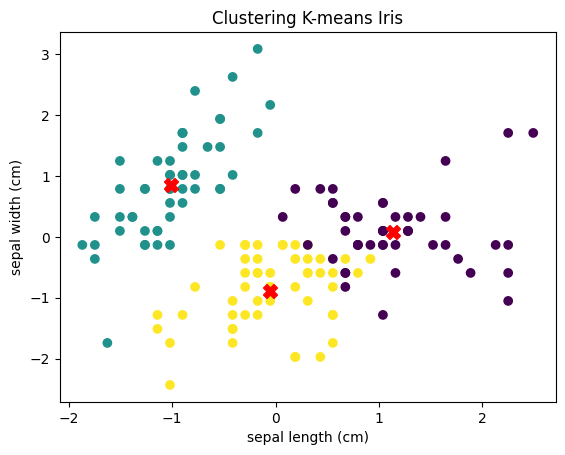

In [ ]:
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], marker='X', color='red', s=100)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title("Clustering K-means Iris")

## Etape 8 : Vérification du nombre K de clusters
Visualisations de la méthode du coude (Elbow) pour déterminer le meilleur nombre K à choisir (retrouver k=3)

In [ ]:
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

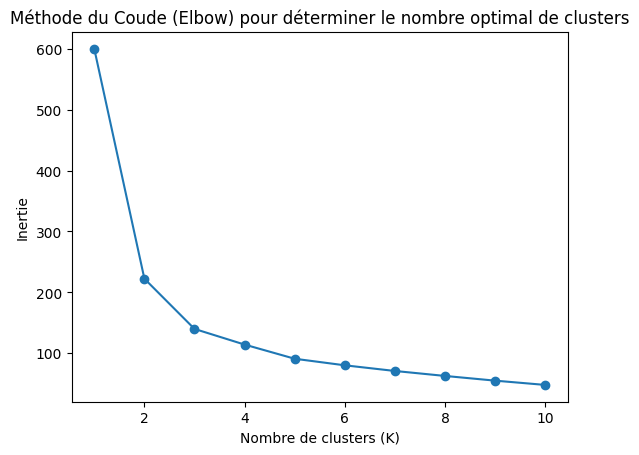

In [ ]:
plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Nombre de clusters (K)')
plt.ylabel('Inertie')
plt.title('Méthode du Coude (Elbow) pour déterminer le nombre optimal de clusters')
plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

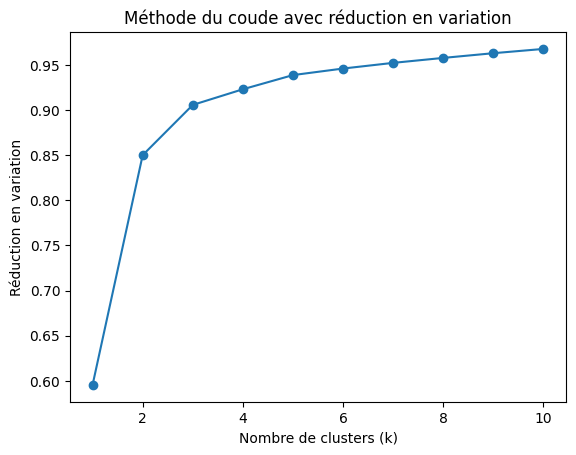

In [ ]:
# Liste pour stocker les valeurs de la réduction en variation
explained_variances = []

# Itération sur différents nombres de clusters
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    explained_variances.append(kmeans.score(scaled_features))

# Calcul de la réduction en variation
total_variance = sum(explained_variances)
variance_reduction = [(total_variance - var) / total_variance for var in explained_variances]

# Tracer la courbe de la méthode du coude avec la réduction en variation
plt.plot(range(1, 11), variance_reduction, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Réduction en variation')
plt.title("Méthode du coude avec réduction en variation")
plt.show()
